In [1]:
from LinesExtraction import *

%matplotlib inline
le = LinesExtraction()
proc = Procesado()

In [2]:
img = le.loadImage('Full2Cropped.png')
path='Kirsch\\'

In [3]:
#Distintas imágenes
imgAdapted = exposure.equalize_adapthist(img, clip_limit=0.0, nbins=100)
imgDenoise = denoise_tv_chambolle(imgAdapted, weight=0.5)

sobelImg = le.sobelY(imgAdapted)
sobelDenoise = denoise_tv_chambolle(sobelImg, weight=0.8)
sobelBin = proc.binarizar(sobelDenoise)
sobelSk = skeletonize(sobelBin)

threshold = threshold_adaptive(sobelDenoise, 1)
sobelThredhold = sobelDenoise >= threshold

sobelSmall = morphology.remove_small_holes(sobelThredhold, 200, connectivity=20)
sobelfrangi = frangi(sobelSmall)
sobelThin = morphology.thin(sobelSmall)
sobel2 = le.sobelY(sobelThin)
sobelSmall2 = morphology.remove_small_objects(sobel2, 64, connectivity=50)


E:\Andres\Anaconda3\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))
E:\Andres\Anaconda3\lib\site-packages\skimage\filters\thresholding.py:222: skimage_deprecation: Function ``threshold_adaptive`` is deprecated and will be removed in version 0.15. Use ``threshold_local`` instead.
  def threshold_adaptive(image, block_size, method='gaussian', offset=0,
E:\Andres\Anaconda3\lib\site-packages\skimage\filters\thresholding.py:224: UserWarning: The return value of `threshold_local` is a threshold image, while `threshold_adaptive` returned the *thresholded* image.
  warn('The return value of `threshold_local` is a threshold image, while '


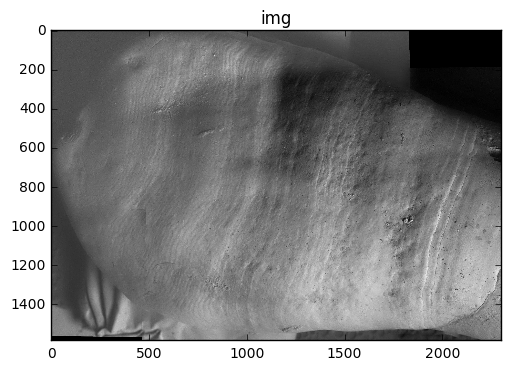

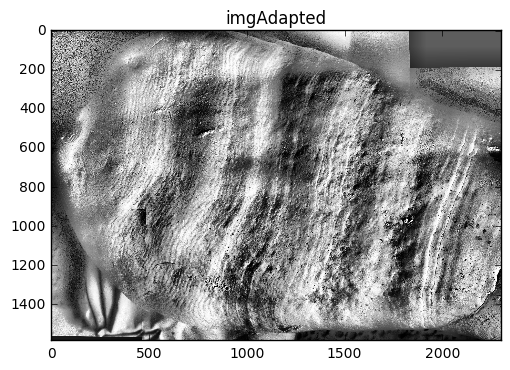

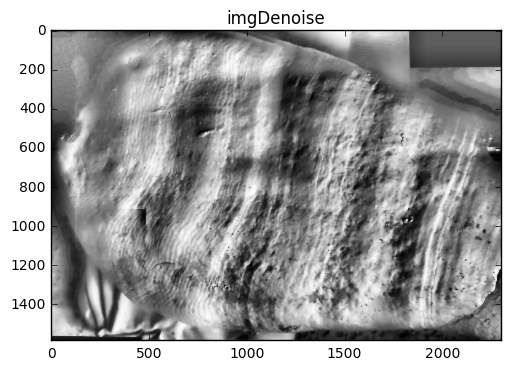

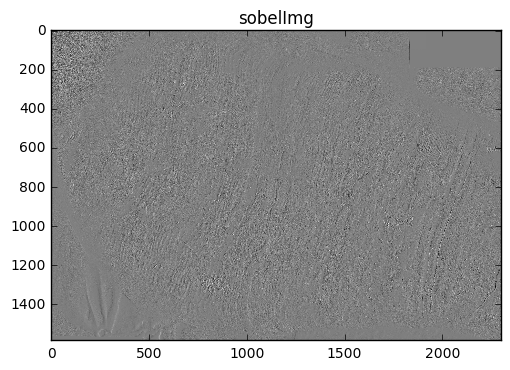

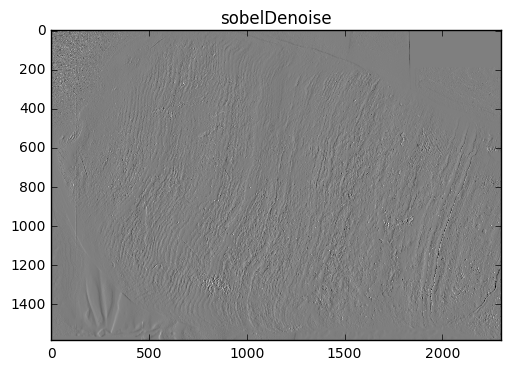

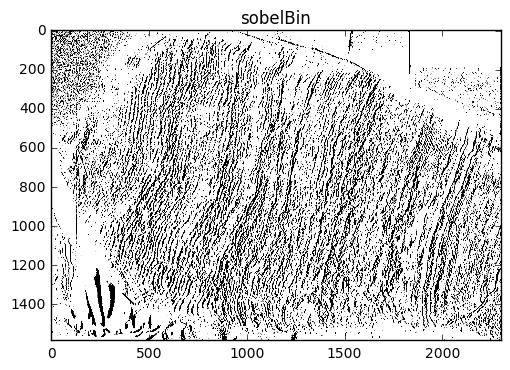

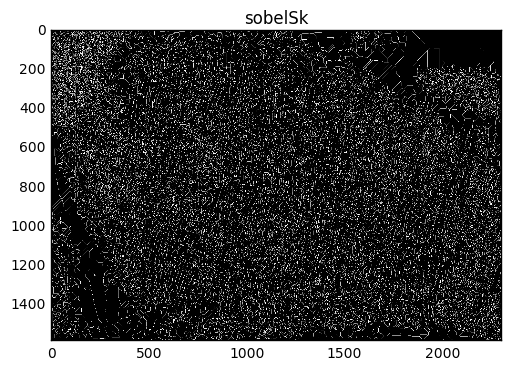

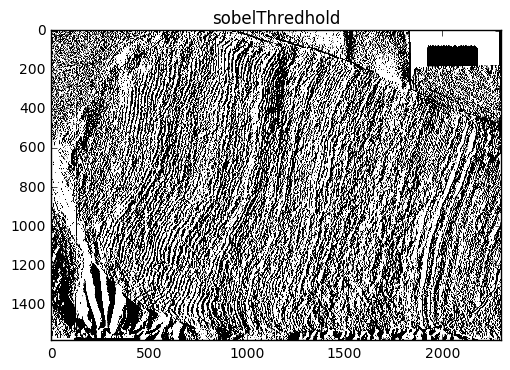

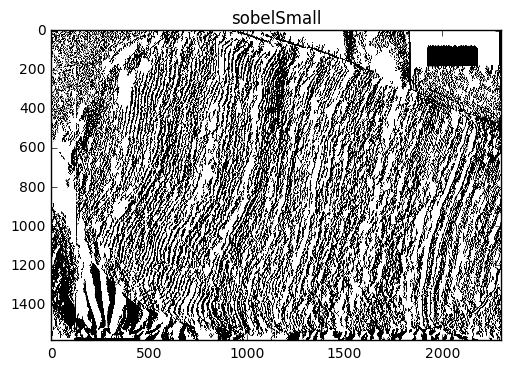

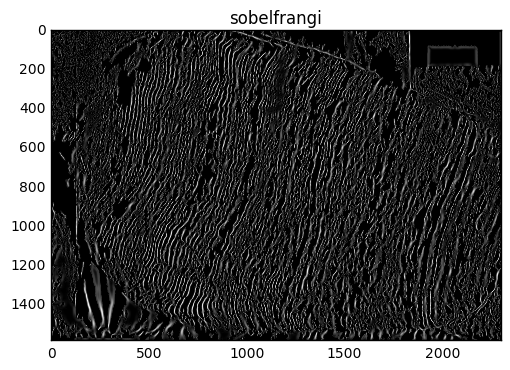

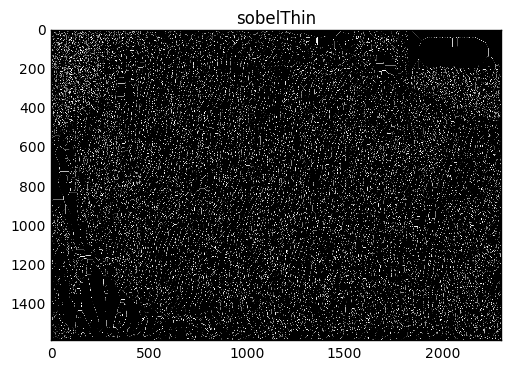

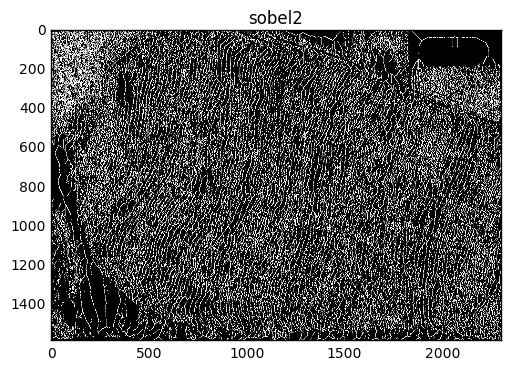

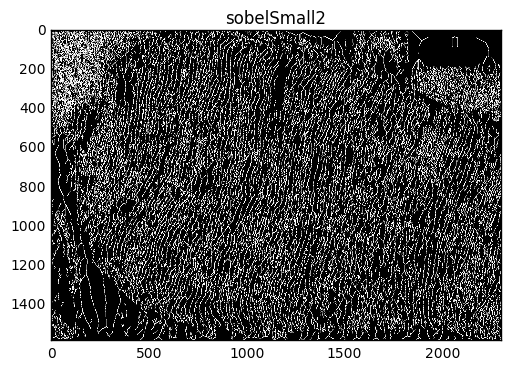

In [4]:
le.mostrarYGuardarImagen(img, True, 'img', path+'img.png', True)
le.mostrarYGuardarImagen(imgAdapted, True, 'imgAdapted', path+'imgAdapted.png', True)
le.mostrarYGuardarImagen(imgDenoise, True,'imgDenoise', path+'imgDenoise.png', True)
le.mostrarYGuardarImagen(sobelImg, True,'sobelImg', path+'sobelImg.png', True)
le.mostrarYGuardarImagen(sobelDenoise, True, 'sobelDenoise', path+'sobelDenoise.png', True)
le.mostrarYGuardarImagen(sobelBin, True, 'sobelBin', path+'sobelBin.png', True)
le.mostrarYGuardarImagen(sobelSk, True, 'sobelSk', path+'sobelSk.png', True)
le.mostrarYGuardarImagen(sobelThredhold, True, 'sobelThredhold', path+'sobelThredhold.png', True)
le.mostrarYGuardarImagen(sobelSmall, True, 'sobelSmall', path+'sobelSmall.png', True)
le.mostrarYGuardarImagen(sobelfrangi, True, 'sobelfrangi', path+'sobelfrangi.png', True)
le.mostrarYGuardarImagen(sobelThin, True, 'sobelThin', path+'sobelThin.png', True)
le.mostrarYGuardarImagen(sobel2, True, 'sobel2', path+'sobel2.png', True)
le.mostrarYGuardarImagen(sobelSmall2, True, 'sobelSmall2', path+'sobelSmall2.png', True)

In [5]:
#Implementación de Kirsch

from scipy.ndimage import generic_filter, convolve

#KERNELS para la convolucion

#kernelG1
N = np.array([[ 5,  5,  5],
              [-3,  0, -3],
              [-3, -3, -3]], dtype=np.float32)
#kernelG2
NW= np.array([[ 5,  5, -3],
              [ 5,  0, -3],
              [-3, -3, -3]], dtype=np.float32)

#kernelG3
W = np.array([[ 5, -3, -3],
              [ 5,  0, -3],
              [ 5, -3, -3]], dtype=np.float32)

#kernelG4
SW= np.array([[-3, -3, -3],
              [ 5,  0, -3],
              [ 5,  5, -3]], dtype=np.float32)

#kernelG5
S= np.array([[-3, -3, -3],
             [-3,  0, -3],
             [ 5,  5,  5]], dtype=np.float32)

#kernelG6
SE= np.array([[-3, -3, -3],
              [-3,  0,  5],
              [-3,  5,  5]], dtype=np.float32)

#kernelG7
E = np.array([[-3, -3,  5],
              [-3,  0,  5],
              [-3, -3,  5]], dtype=np.float32)

#kernelG8
NE= np.array([[-3,  5,  5],
              [-3,  0,  5],
              [-3, -3, -3]], dtype=np.float32)

kernels=[N, NW, W, SW, S, SE, E, NE]

# Aplicacion del kernel

In [6]:
kernelsImg=list()
for i in range(len(kernels)):
    image = convolve(img, kernels[i])
    kernelsImg.append(image)
    le.mostrarYGuardarImagen(image, False, str(i), path+'UnDenoised\\'+str(i+1)+'-kernel-img.png', True)

In [7]:
kernelsImgDenoise=list()
for i in range(len(kernels)):
    image = convolve(imgDenoise, kernels[i])
    kernelsImgDenoise.append(image)
    le.mostrarYGuardarImagen(image, False, str(i), path+'Denoised\\'+str(i+1)+'-kernel-imgDenoise.png', True)

In [8]:
kernelsSobelDenoise=list()
for i in range(len(kernels)):
    image = convolve(sobelDenoise, kernels[i])
    kernelsSobelDenoise.append(image)
    le.mostrarYGuardarImagen(image, False, str(i), path+'SobelDenoise\\'+str(i+1)+'-kernel-sobelDenoise.png', True)

In [9]:
kernelsSobelFrangi=list()
for i in range(len(kernels)):
    image = convolve(sobelfrangi, kernels[i])
    kernelsSobelFrangi.append(image)
    le.mostrarYGuardarImagen(image, False, str(i), path+'SobelFrangi\\'+str(i+1)+'-kernel-sobelFrangi.png', True)

## Resultados
La que mejor resultados da es la imagen ecualizada y quitando ruido, con los kernels 2-3, 6-7

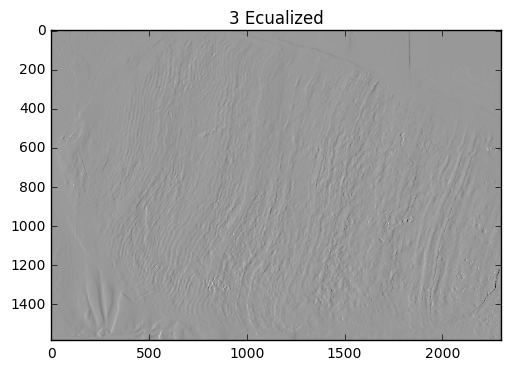

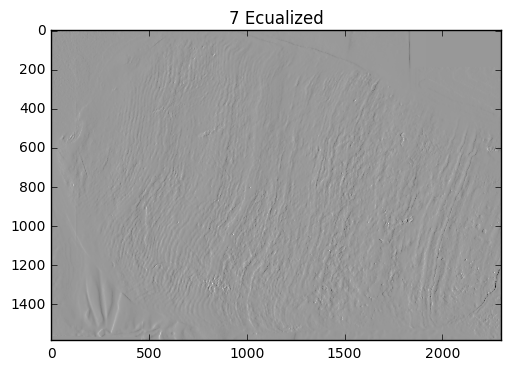

In [10]:
le.mostrarYGuardarImagen(kernelsImgDenoise[2], title="3 Ecualized",mostrar=True, guardar=False)
le.mostrarYGuardarImagen(kernelsImgDenoise[2], title="7 Ecualized",mostrar=True, guardar=False)

In [11]:
# kernels personalizados

#kernelG3
WCustom1 = np.array([[ 5, -3, -3],
                     [ 5,  0, -3],
                     [ 5, -3, -3]], dtype=np.float32)

#kernelG3
WCustom2 = np.array([[ 7, -1, -1],
                     [ 7,  0, -1],
                     [ 7, -1, -1]], dtype=np.float32)


#kernelG7
ECustom1 = np.array([[-3, -3,  7],
                     [-3,  0,  7],
                     [-3, -3,  7]], dtype=np.float32)

#kernelG7
ECustom2 = np.array([[-1, -1,  7],
                     [-1,  0,  7],
                     [-1, -1,  7]], dtype=np.float32)

kernelsCustom=[WCustom1, WCustom2, ECustom1, ECustom2]

In [12]:
kernelsCustomDenoise=list()
for i in range(len(kernelsCustom)):
    image = convolve(imgDenoise, kernelsCustom[i])
    kernelsCustomDenoise.append(image)
    le.mostrarYGuardarImagen(image, False, str(i), path+'CustomKernels\\'+str(i+1)+'-kernel-DenoiseCustomKernels.png', True)

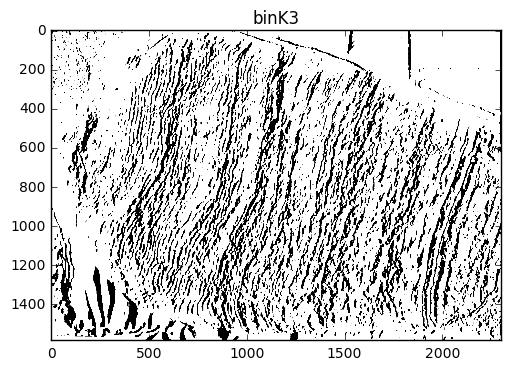

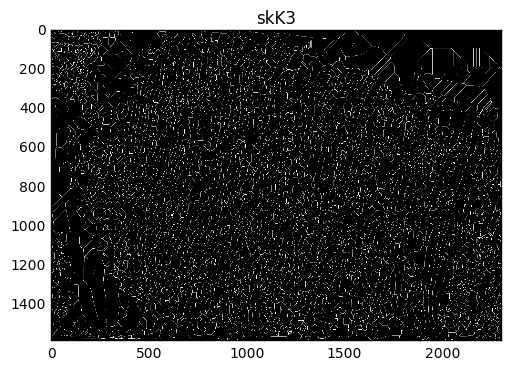

In [13]:
imgDenoisedK3 = kernelsImgDenoise[2]
binK3 = proc.binarizar(imgDenoisedK3)
le.mostrarYGuardarImagen(binK3, True, 'binK3', path+'Binarized\\'+str(i+1)+'-kernel-binK3.png', True)
skK3 = skeletonize(binK3)
le.mostrarYGuardarImagen(skK3, True, 'skK3', path+'Skeletonize\\'+str(i+1)+'-kernel-skK3.png', True)

E:\Andres\Anaconda3\lib\site-packages\skimage\filters\thresholding.py:222: skimage_deprecation: Function ``threshold_adaptive`` is deprecated and will be removed in version 0.15. Use ``threshold_local`` instead.
  def threshold_adaptive(image, block_size, method='gaussian', offset=0,
E:\Andres\Anaconda3\lib\site-packages\skimage\filters\thresholding.py:224: UserWarning: The return value of `threshold_local` is a threshold image, while `threshold_adaptive` returned the *thresholded* image.
  warn('The return value of `threshold_local` is a threshold image, while '


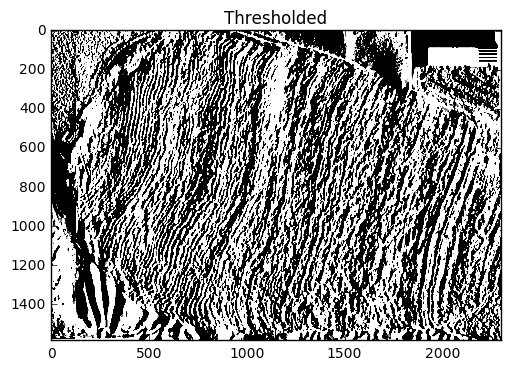

In [28]:
t = threshold_adaptive(imgDenoisedK3, 1)
#tKirsch3 = imgDenoisedK3 >= t
tKirsch3 = imgDenoisedK3 < t
le.mostrarYGuardarImagen(tKirsch3, True, 'Thresholded', path+'Thresholded\\'+str(i+1)+'-kernel-tKirsch3.png', True)

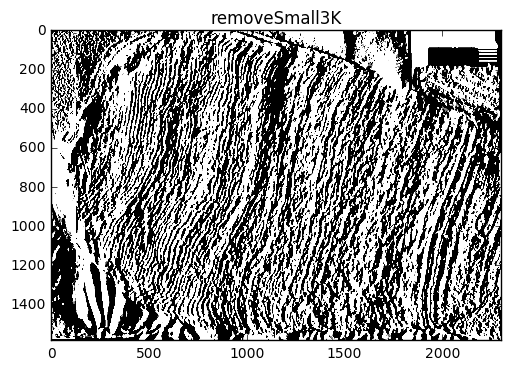

In [15]:
removeSmall3K = remove_small_objects(tKirsch3, 30, connectivity=50)
le.mostrarYGuardarImagen(removeSmall3K, True, 'removeSmall3K', path+'Thresholded\\'+str(i+1)+'-kernel-removeSmall3K.png', True)

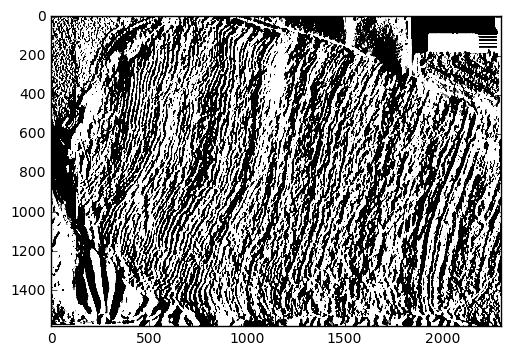

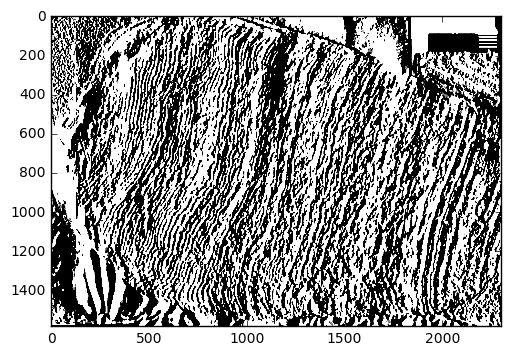

In [16]:
tKirsch3_2 = ~np.array(tKirsch3)
le.mostrarYGuardarImagen(tKirsch3_2, mostrar=True, guardar=False)

removeSmall3K_2 = remove_small_objects(tKirsch3_2, 30, connectivity=50)

tKirsch3_3 = ~np.array(removeSmall3K_2);
le.mostrarYGuardarImagen(tKirsch3_3, True, None, path+'Thresholded\\'+str(i+1)+'-kernel-tKirsch3_3.png', True)

In [17]:
def eliminarObjetosDoble(img, smallObjects=30, conn=50):
    img_2 = remove_small_objects(img, smallObjects, connectivity=conn)
    img_3 = ~np.array(img)
    img_4 = remove_small_objects(img_3, smallObjects, connectivity=conn)
    return ~np.array(img_4)

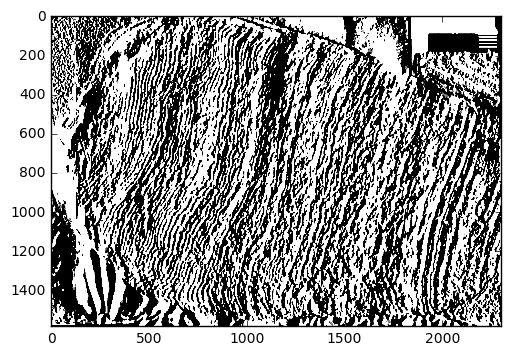

In [18]:
notSmallObjectsK3 = eliminarObjetosDoble(tKirsch3)
le.mostrarYGuardarImagen(notSmallObjectsK3, True, None, path+'Thresholded\\'+str(i+1)+'-kernel-notSmallObjectsK3.png', True)

In [19]:
# http://stackoverflow.com/questions/7773925/normalize-numpy-arrays-from-various-image-objects
# Normalizar imagen
def normalize(arr):
    arr=arr.astype('float32')
    if arr.max() > 1.0:
        arr/=255.0
    return arr

# Esquelotinozación 3D

La esqueletonización 3D mejora la deteccion de las perikymata

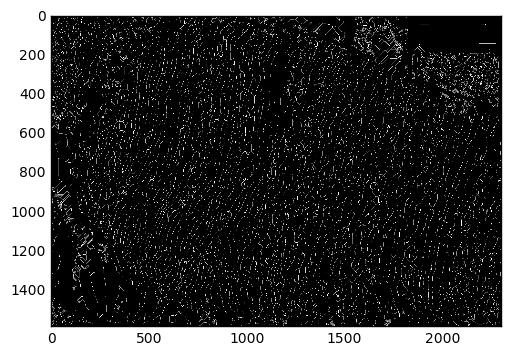

In [20]:
# http://scikit-image.org/docs/0.13.x/api/skimage.morphology.html#skimage.morphology.skeletonize_3d
from skimage.morphology import skeletonize_3d
sk3d = skeletonize_3d(notSmallObjectsK3)
le.mostrarYGuardarImagen(sk3d, True, None, path+'Skeletonize\\'+str(i+1)+'-kernel-sk3d.png', True)

## Pruebas con la Transformada de Hough

Líneas detectadas: 4971


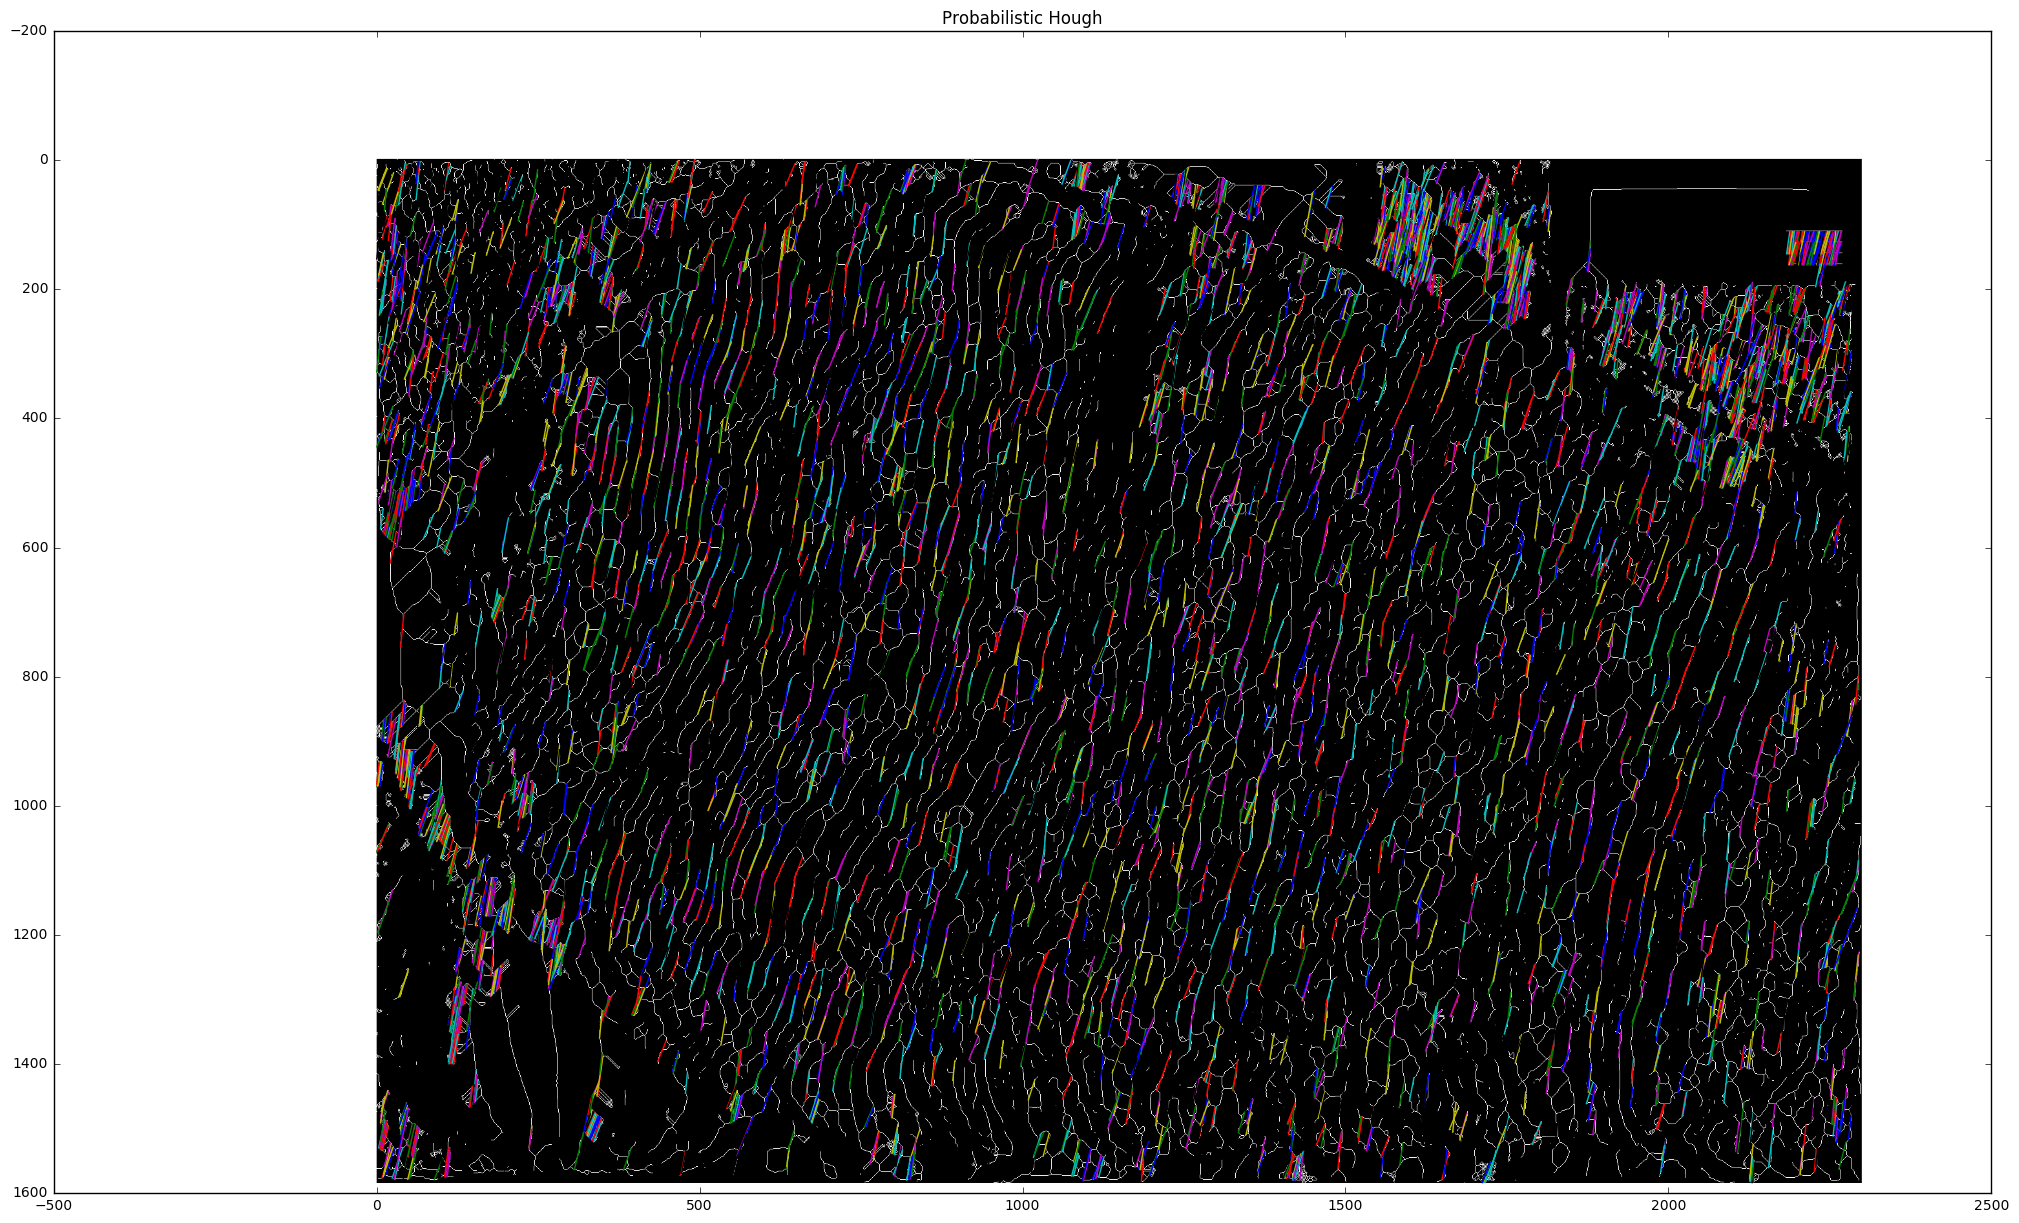

In [21]:
from skimage.transform import probabilistic_hough_line
from scipy import pi

# Ángulos en radianes
# https://upload.wikimedia.org/wikipedia/commons/9/9a/Degree-Radian_Conversion.svg

angulos = np.linspace(0.1, 0.4, num=300)

#angulos2 = np.linspace(3.2, 3.5, num=300)
lines = probabilistic_hough_line(sk3d, threshold=0, line_length=30, line_gap=16, theta=angulos)
print('Líneas detectadas: '+str(len(lines)))


fig = plt.figure(figsize=(25, 16))
plt.imshow(sk3d, cmap=plt.cm.gray)

plt.title('Probabilistic Hough')
for line in lines:
    p0, p1 = line
    plt.plot((p0[0], p1[0]), (p0[1], p1[1]))
plt.show()
houghPath='HoughLines\\'

#Guardamos la figura con la información de los parámetros
# angulos, line_lenght, line_gap
fig.savefig(path+houghPath+'Ang01-04_ll-30_lg16.png', bbox_inches='tight')

Líneas detectadas: 4970


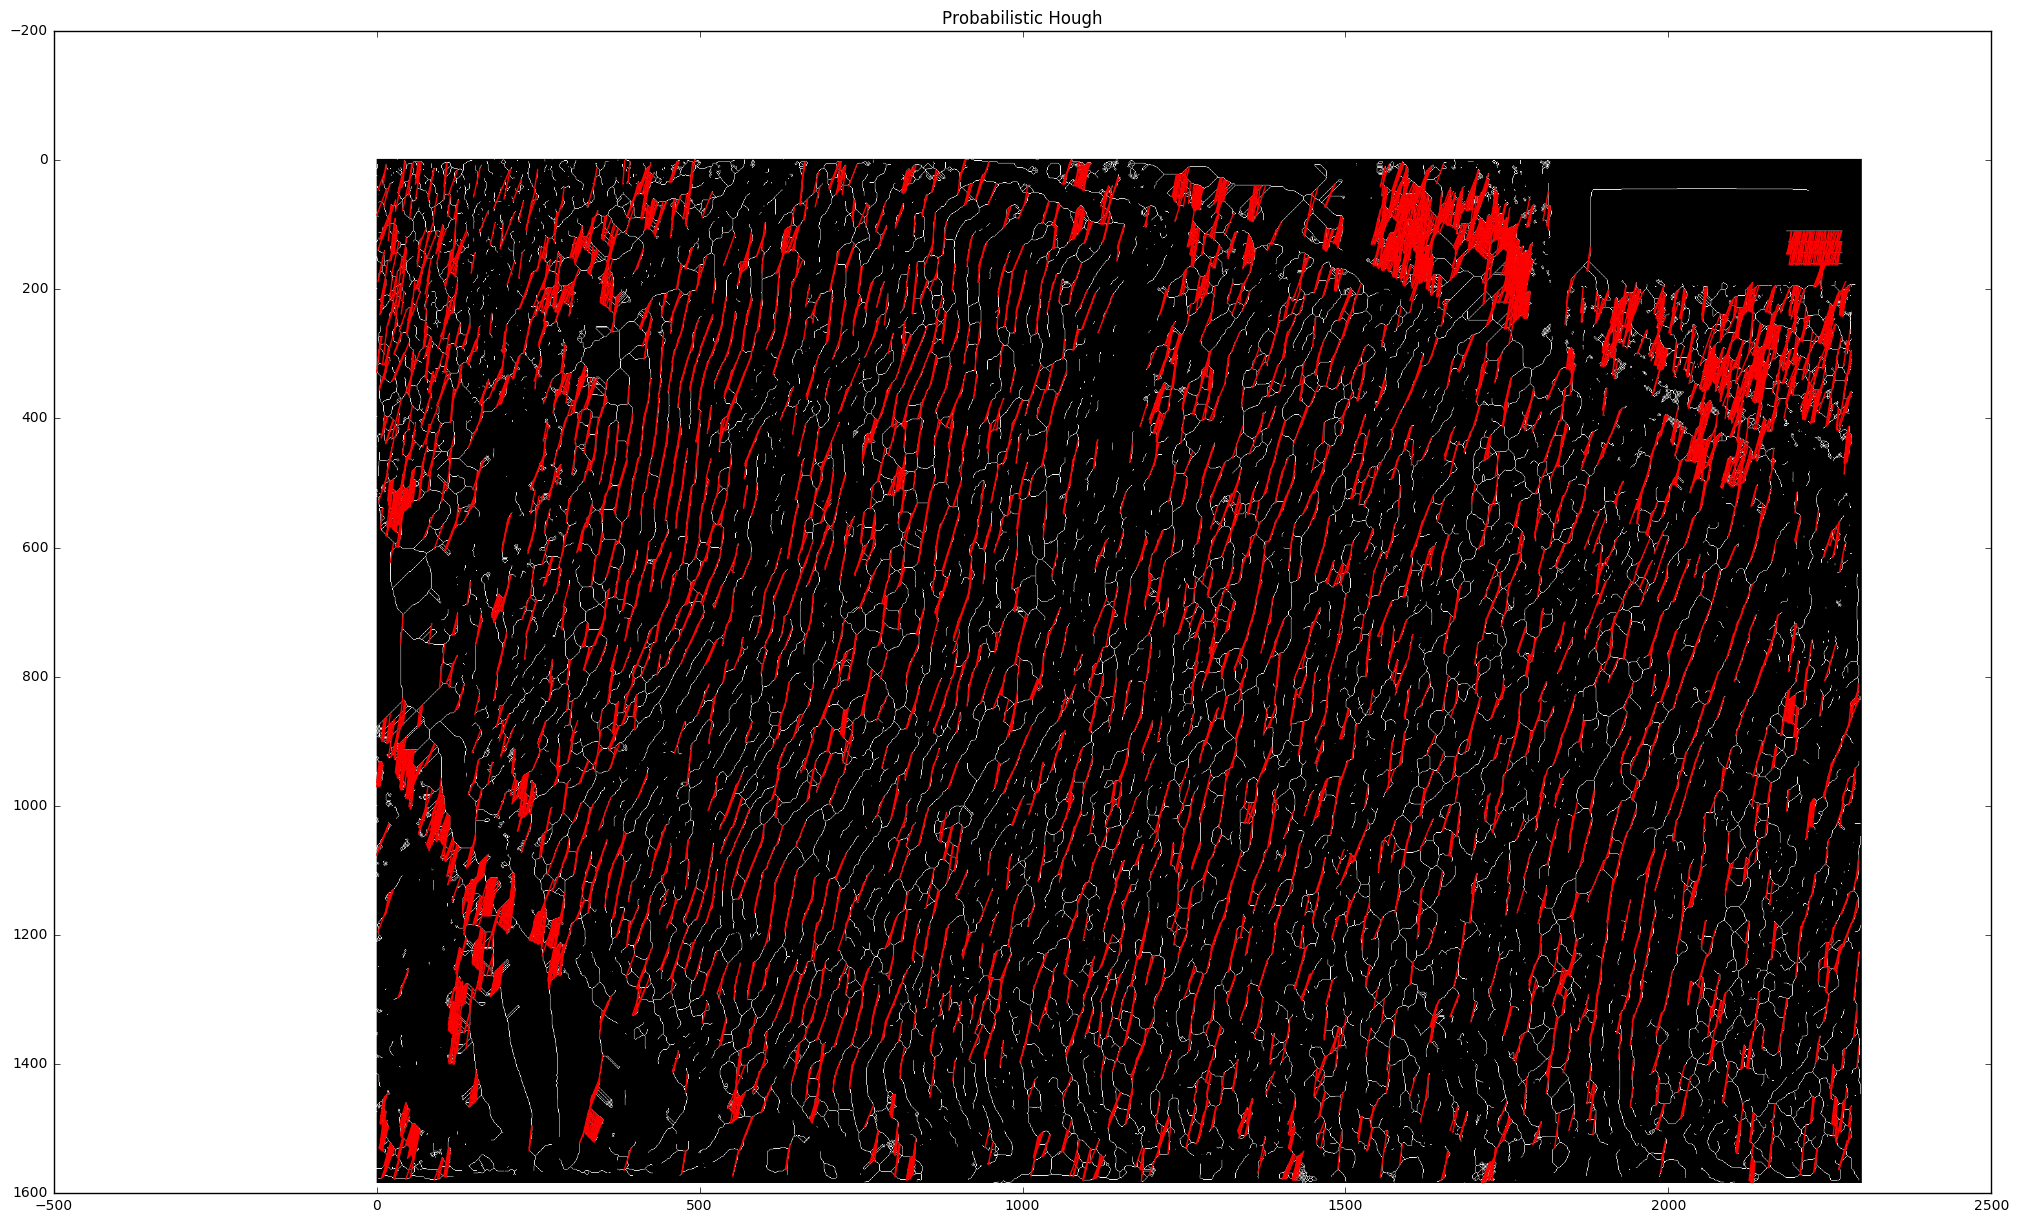

In [22]:
lines = probabilistic_hough_line(sk3d, threshold=0, line_length=30, line_gap=16, theta=angulos)
print('Líneas detectadas: '+str(len(lines)))


fig = plt.figure(figsize=(25, 16))
plt.imshow(sk3d, cmap=plt.cm.gray)

plt.title('Probabilistic Hough')
for line in lines:
    p0, p1 = line
    plt.plot((p0[0], p1[0]), (p0[1], p1[1]),'r',linewidth=1)
plt.show()
houghPath='HoughLines\\'

#Guardamos la figura con la información de los parámetros
# angulos, line_lenght, line_gap
fig.savefig(path+houghPath+'Ang01-04_ll-30_lg16_R.png', bbox_inches='tight')


## Combinar segmentos 


In [23]:
#import pandas as pd
import networkx as nx

G=nx.Graph()

In [24]:
from time import time

t1= time()
#G=proc.combina2(3,5,5,5,lines,G)
G=proc.combina2(1,10,1.0,5,lines,G)
k_components = apxa.k_components(G)
segmentosDeVerdad=proc.segmentosVerdad(k_components,lines)
t2 = time()
print((t2-t1)/60)

3.8719075957934064


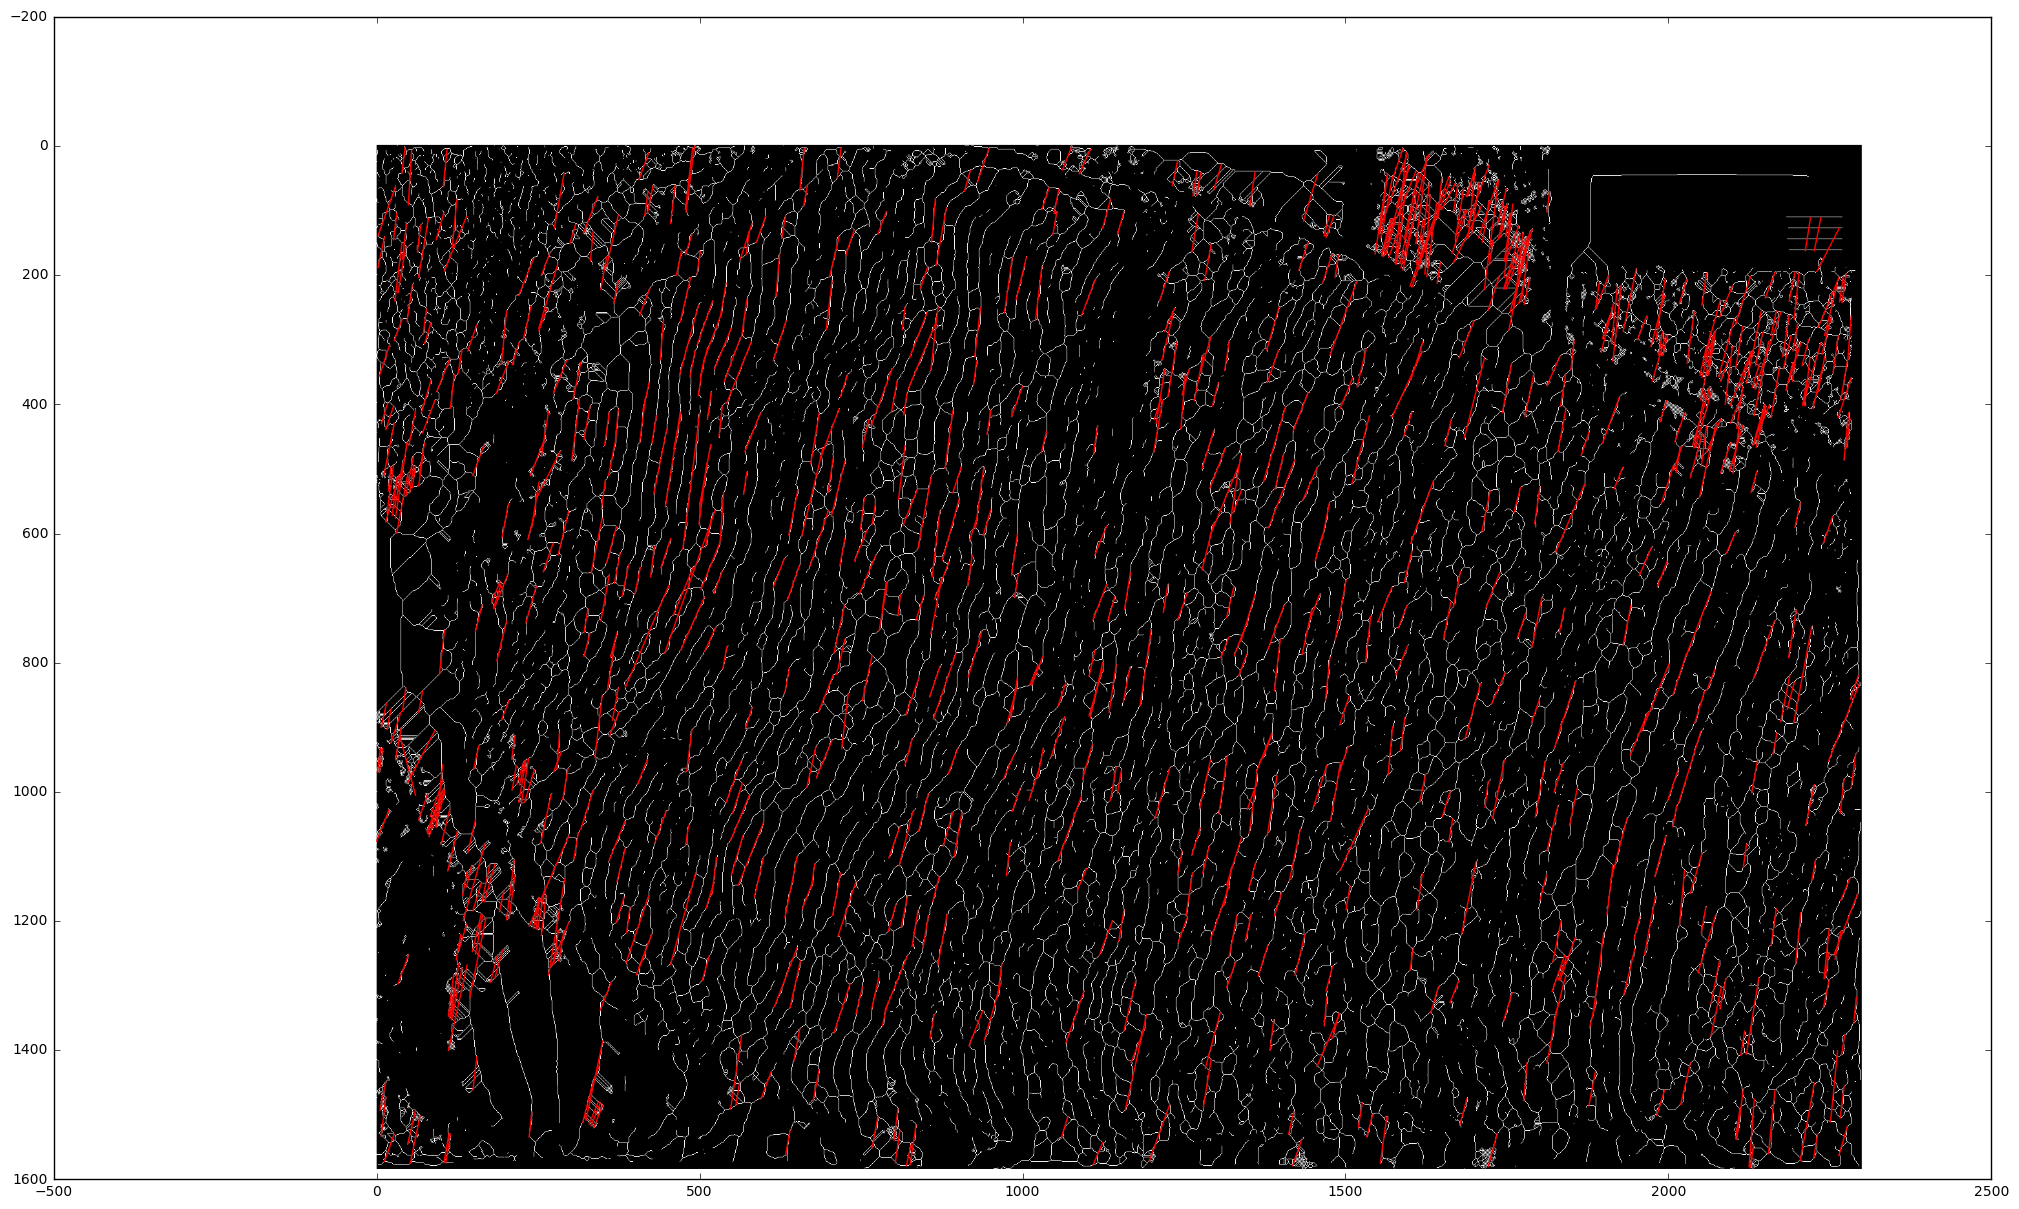

In [25]:
fig = plt.figure(figsize=(25, 16))
plt.imshow(sk3d, cmap=plt.cm.gray)
for line in segmentosDeVerdad:
    p0, p1 = line
    plt.plot((p0[0], p1[0]), (p0[1], p1[1]),'r',linewidth=1)

#Guardo la figura indicando los parámetros de la combinacion
fig.savefig(path+houghPath+'SegmentosUnidos_1_10_1_5.png', bbox_inches='tight')

In [26]:
#Segunda Pasada

F=nx.Graph()
t1= time()
F=proc.combina2(30,5,3,3,segmentosDeVerdad,F)
k_components = apxa.k_components(F)
segmentosDeVerdad2=proc.segmentosVerdad(k_components,segmentosDeVerdad)
t2 = time()
print((t2-t1)/60)

0.2387085239092509


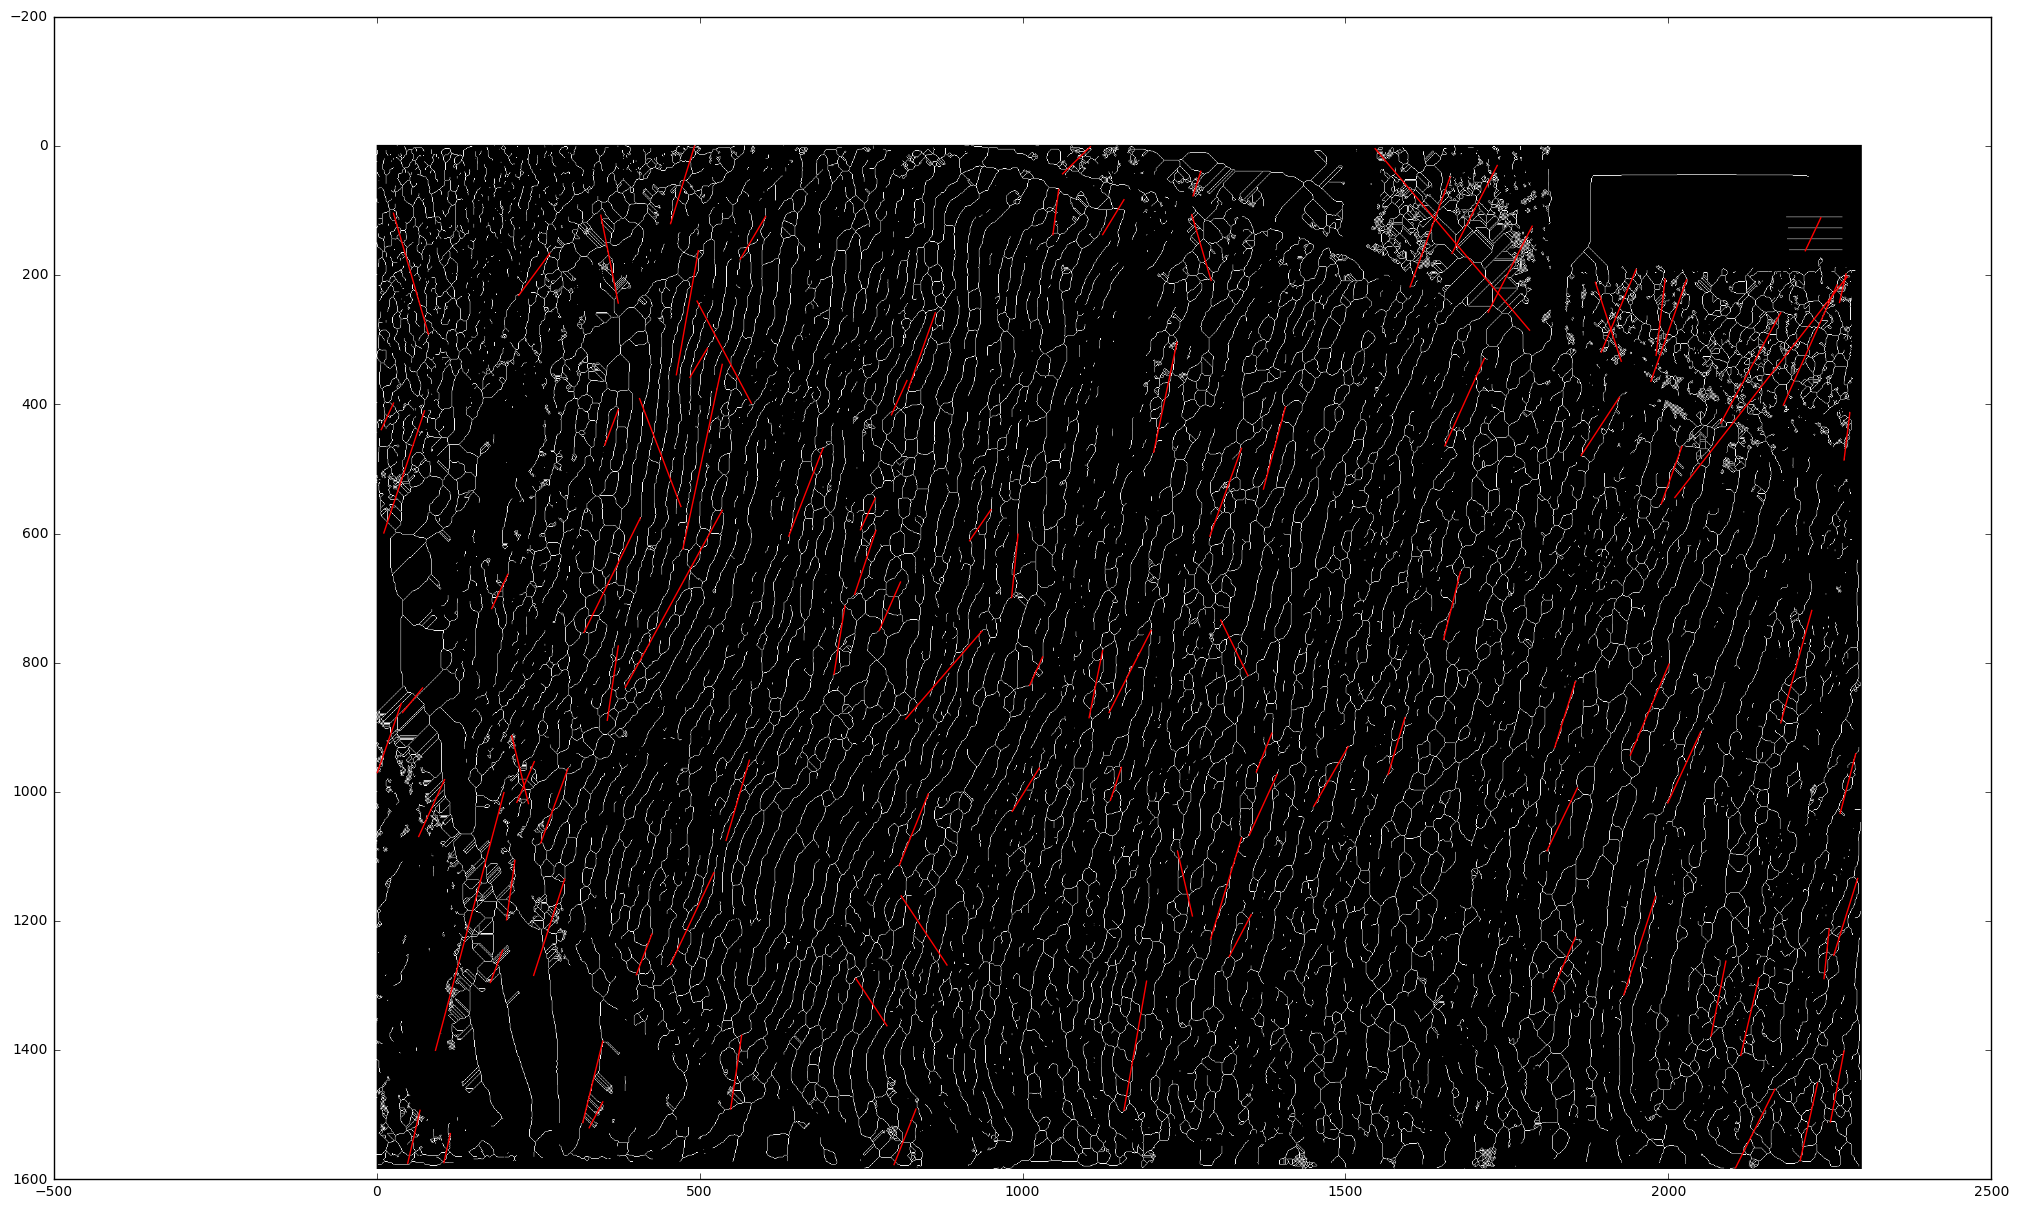

In [27]:
fig = plt.figure(figsize=(25, 16))
plt.imshow(sk3d, cmap=plt.cm.gray)
for line in segmentosDeVerdad2:
    p0, p1 = line
    plt.plot((p0[0], p1[0]), (p0[1], p1[1]),'r',linewidth=1)
fig.savefig(path+houghPath+'SegmentosUnidos2.png', bbox_inches='tight')

# Conclusiones
De momento, unicamente se valora positivamente la detección de las líneas sin unir los segmentos, ya que empeora el resultado.
Habría que hacer más pruebas con otros dientes y tambíen con distintos parámetros en las funciones de combinar